In [2]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
from io import BytesIO
import os

In [24]:
def check_for_csv_files(path):
    csv_files = [file for file in os.listdir(path) if file.endswith(('.csv'))]
    return csv_files

base_dir = r'C:\processing\charlotte HCO3 NaOH exp\240322 HCO3 vs NaOH pH 8\final_prediction_files'

file_names = check_for_csv_files(base_dir)

base_files = check_for_csv_files(base_dir + r'\pre_image')
washout_files = check_for_csv_files(base_dir + r'\washout')

T10_files = check_for_csv_files(base_dir + r'\start')

T60_files = check_for_csv_files(base_dir + r'\end')

washout_files

['washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well004_prediction.csv',
 'washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well008_prediction.csv',
 'washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well012_prediction.csv',
 'washout HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well003_prediction.csv',
 'washout HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well007_prediction.csv',
 'washout HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well011_prediction.csv',
 'washout NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well002_prediction.csv',
 'washout NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well006_prediction.csv',
 'washout NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well010_prediction.csv',
 'washout NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well001_prediction.csv',
 'washout NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well005_pre

In [ ]:
def read_files(csv_files):
    data = []
    for file in csv_files:
        df = pd.read_csv(os.path.join(directory_to_check, file))
        data.append(df)
    return data

data = read_files(csv_files)

def process_data(data):
    combined_values = []
    conditions = []
    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean()
        total_column_sum = df.sum(axis=0).sum()
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value)
        if i < 3:
            condition = 'NaOH - Cys.'
        elif i < 6:
            condition = 'NaOH + Cys.'
        elif i < 9:
            condition = 'HCO3 - Cys.'
        else:
            condition = 'HCO3 + Cys.'
        conditions.append(condition)
    return combined_values, conditions

def create_boxplot(combined_values, conditions):
    data = {'Condition': conditions, 'Value': combined_values}
    df = pd.DataFrame(data)
    sns.boxplot(x='Condition', y='Value', data=df, linewidth=2)
    sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
    means = df.groupby('Condition')['Value'].mean().reset_index()
    plt.title('Estimated Spikes Total per Well Washout', fontweight='bold', fontsize=18)
    plt.xlabel('Condition', fontweight='bold', fontsize=18)
    plt.ylabel('Estimated Spikes / Well (min-1)', fontweight='bold', fontsize=18)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.xticks(fontweight='bold', fontsize=12)
    plt.yticks(fontweight='bold', fontsize=18)
    plt.ylim([0, 1800])
    plt.show()

In [21]:
#Estimated Total Spikes per Well, sum of rows and frames (sum all prediction values)
#Graph 1

washout_files = check_for_csv_files(base_dir + r'\washout')

def read_files(base_dir, file_names):
    data = []
    for file_name in file_names:
        file_path = f"{base_dir}/{file_name}"
        df = pd.read_csv(file_path)
        data.append(df)
    return data

def process_data(data):
    combined_values = []
    conditions = []
    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean()
        total_column_sum = df.sum(axis=0).sum()
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value)
        if i < 3:
            condition = 'HCO3 - Cys'
        elif i < 6:
            condition = 'HCO3 + Cys'
        elif i < 9:
            condition = 'NaOH - Cys'
        else:
            condition = 'NaOH + Cys'
        conditions.append(condition)
    return combined_values, conditions

def create_boxplot(combined_values, conditions, group_order = None):
    data = {'Condition': conditions, 'Value': combined_values}
    df = pd.DataFrame(data)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot()

    sns.boxplot(x='Condition', y='Value', order=group_order, data=df, linewidth=2)
    sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True, order = group_order)
    if group_order:
        tick_positions = {group: pos for pos, group in enumerate(group_order)}
    else:
        tick_positions = {ax.get_xticklabels()[index].get_text(): ax.get_xticks()[index] for index in
                            range(len(ax.get_xticklabels()))}
    means = df.groupby('Condition')['Value'].mean().reset_index()
    plt.title('Estimated Spikes Total per Well at baseline', fontweight='bold', fontsize=18)
    plt.xlabel('Condition', fontweight='bold', fontsize=18)
    plt.ylabel('Estimated Spikes / Cell $(min^{-1})$', fontweight='bold', fontsize=18)
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.xticks(fontweight='bold', fontsize=12)
    plt.yticks(fontweight='bold', fontsize=18)
    plt.ylim([0, 10000])
    plt.show()

group_order = ['NaOH - Cys','NaOH + Cys', 'HCO3 - Cys', 'HCO3 + Cys']
if __name__ == '__main__':
    data = read_files(base_dir, washout_files)
    combined_values, conditions = process_data(data)
    create_boxplot(combined_values, conditions, group_order = group_order)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\processing\\charlotte HCO3 NaOH exp\\240322 HCO3 vs NaOH pH 8\\final_prediction_files/washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well004_prediction.csv'

(array([1, 2]), [Text(1, 0, 'Control'), Text(2, 0, 'KCl')])

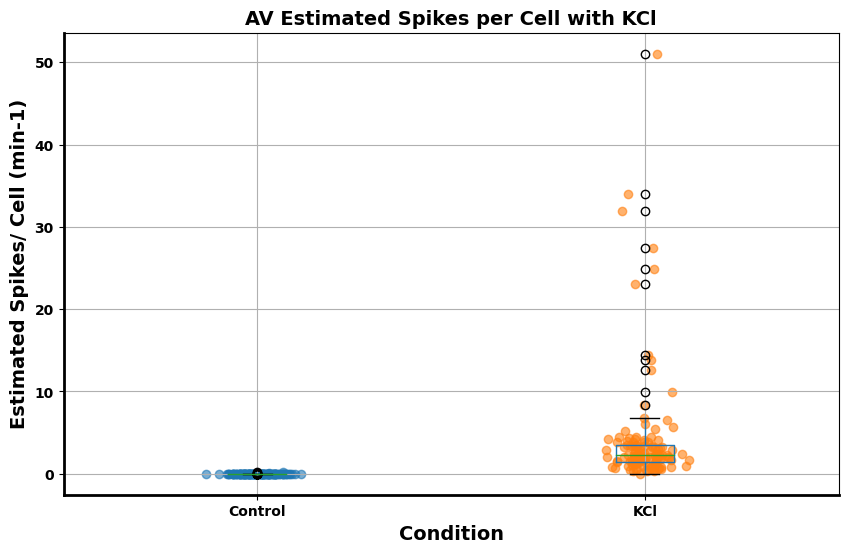

In [51]:
#Average Estimated Spikes per cell, sum every row in Histogram! (Graph 2)


data = pd.read_csv(r'D:\zeiss\Desktop\charlotte\240501 HA GCaMP6f activity with blockers\final_prediction_files/predictions_deltaF_5.csv')
data2 = pd.read_csv(r'D:\zeiss\Desktop\charlotte\240501 HA GCaMP6f activity with blockers\final_prediction_files\predictions_deltaF_KCL_5.csv')
#data3 = pd.read_csv(r'D:\zeiss\Desktop\charlotte\240501 HA GCaMP6f activity with blockers\final_prediction_files\predictions_deltaF_21.csv')
#data4 = pd.read_csv(r'D:\zeiss\Desktop\charlotte\240501 HA GCaMP6f activity with blockers\final_prediction_files\predictions_deltaF_24.csv')

# Calculate the sum of each row for each DataFrame
row_sums_data = data.sum(axis=1)
row_sums_data2 = data2.sum(axis=1)
#row_sums_data3 = data3.sum(axis=1)
#row_sums_data4 = data4.sum(axis=1)

# Combine the row sums into a single DataFrame with appropriate labels
combined_data = pd.DataFrame({
    'Control': row_sums_data,
    'KCl': row_sums_data2,
    #'Well 021': row_sums_data3,
    #'Well 024': row_sums_data4
})

# Plotting the boxplot
fig = plt.figure(figsize=(10, 6))
boxplot = combined_data.boxplot()

# Add scatter plot on top of boxplot for each set of data
for i, col in enumerate(combined_data.columns):
    y = combined_data[col]
    x = np.random.normal(i+1, 0.04, size=len(y))  # Add some jitter to the x-axis positions
    plt.scatter(x, y, alpha=0.6)
plt.title('AV Estimated Spikes per Cell with KCl', fontweight='bold', fontsize=14)
plt.xlabel('Condition', fontweight='bold', fontsize=14)
plt.ylabel('Estimated Spikes / Cell (min-1)', fontweight='bold', fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')



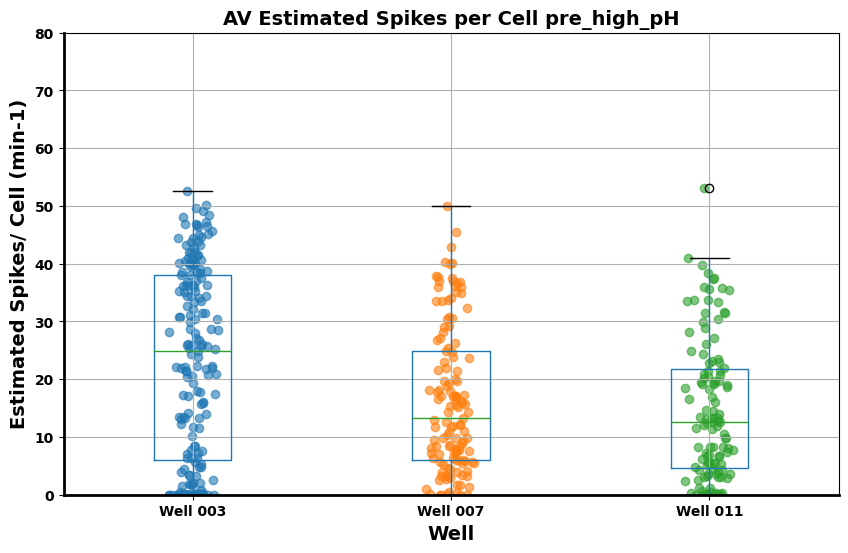

In [29]:
#Average Estimated Spikes per cell, sum every row in Histogram! (Graph 2)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from CSV files
data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted/predictions_deltaF_5.csv')
data2 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_deltaF_KCl_5.csv')
#data3 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_high_pH_Well11.csv')

# Calculate the sum of each row for each DataFrame
row_sums_data = data.sum(axis=1)
row_sums_data2 = data2.sum(axis=1)
#row_sums_data3 = data3.sum(axis=1)

# Combine the row sums into a single DataFrame with appropriate labels
combined_data = pd.DataFrame({
    'Well 003': row_sums_data,
    'Well 007': row_sums_data2,
    #'Well 011': row_sums_data3
})

# Plotting the boxplot
plt.figure(figsize=(10, 6))
boxplot = combined_data.boxplot()

# Add scatter plot on top of boxplot for each set of data
for i, col in enumerate(combined_data.columns):
    y = combined_data[col]
    x = np.random.normal(i+1, 0.04, size=len(y))  # Add some jitter to the x-axis positions
    plt.scatter(x, y, alpha=0.6)
plt.title('AV Estimated Spikes per Cell pre_high_pH', fontweight='bold', fontsize=14)
plt.xlabel('Well', fontweight='bold', fontsize=14)
plt.ylabel('Estimated Spikes/ Cell (min-1)', fontweight='bold', fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.ylim([0, 80])
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

In [32]:
#CV_ISF per Well

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted/prediction_df_high pH_Well3.csv')
data2 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\prediction_exp_pre_high_well007.csv')
data3 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_exp_pre_high__well011.csv')

data4 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted/predictions_240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_exp_end_well003.csv')
data5 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_exp_end_well007.csv')
data6 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_exp_end_well011.csv')

# Calculate the sum of each row and divide by the number of non-NaN rows
row_sum1 = data.sum(axis=1).mean()  # Sum each row, then calculate average of these sums
row_sum2 = data2.sum(axis=1).mean()
row_sum3 = data3.sum(axis=1).mean()
row_sum4 = data4.sum(axis=1).mean()  # Sum each row, then calculate average of these sums
row_sum5 = data5.sum(axis=1).mean()
row_sum6 = data6.sum(axis=1).mean()

# Number of rows with values for each dataset
num_rows_data = 104
num_rows_data2 = 156
num_rows_data3 = 74
num_rows_data4 = 104
num_rows_data5 = 156
num_rows_data6 = 74

# Calculate the sum of each row and divide by the number of rows with values
row_sum1_div_rows = data.sum(axis=1).sum() / num_rows_data  # Sum each row, sum these and then divide by the number of rows with values
row_sum2_div_rows = data2.sum(axis=1).sum() / num_rows_data2
row_sum3_div_rows = data3.sum(axis=1).sum() / num_rows_data3
row_sum4_div_rows = data4.sum(axis=1).sum() / num_rows_data4  
row_sum5_div_rows = data5.sum(axis=1).sum() / num_rows_data5
row_sum6_div_rows = data6.sum(axis=1).sum() / num_rows_data6

# Calculate the overall average of each DataFrame
overall_average1 = data.mean().mean()  # Calculate the mean of each column, then the mean of those means
overall_average2 = data2.mean().mean()
overall_average3 = data3.mean().mean()
overall_average4 = data4.mean().mean()  
overall_average5 = data5.mean().mean()
overall_average6 = data6.mean().mean()

# Divide the average row sum by the overall average for each dataset
cv1 = row_sum1_div_rows / overall_average1
cv2 = row_sum2_div_rows / overall_average2
cv3 = row_sum3_div_rows / overall_average3
cv4 = row_sum1_div_rows / overall_average4
cv5 = row_sum2_div_rows / overall_average5
cv6 = row_sum3_div_rows / overall_average6


# Create a DataFrame with your data
data = {
    'Condition': ['pre_high_pH', 'pre_high_pH', 'pre_high_pH', 'end_high_pH', 'end_high_pH', 'end_high_pH'],
    'Value': [cv1, cv2, cv3, cv4, cv5, cv6]
}

df = pd.DataFrame(data)

# Create a stripplot
sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()

plt.title('CV NISF under Different Conditions', fontweight='bold')
plt.xlabel('Condition', fontweight='bold')
plt.ylabel('Spikes per Minute', fontweight='bold')
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\zeiss\\Desktop\\rotation_stud\\prediction_df_csv_converted\\predictions_exp_pre_high__well011.csv'

In [11]:
import pickle

pkl_file = r'D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\pkl_files\high pH-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_exp_start_well003Dur60sInt100msBin20000ms_filtered.pkl'
with open(pkl_file, 'rb') as f:
    pkl_data = pickle.load(f)

pkl_data

,NeuronID,IsUsed,Skew,EstimatedSpikes,SD_ES,cv_ES,Total Frames,SpikesFreq,group,dataset,file_name
0,0,True,1.261952,16.139157,0.073201,2.426554,535,0.301666,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
1,1,True,0.450461,29.985249,0.114493,2.042805,535,0.560472,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
2,2,True,1.237393,48.163410,0.196670,2.184616,535,0.900251,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
3,3,True,0.844576,30.855391,0.118713,2.058363,535,0.576736,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
4,4,True,1.214549,50.155663,0.205520,2.192235,535,0.937489,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
...,...,...,...,...,...,...,...,...,...,...,...
174,174,True,1.096368,6.285576,0.030764,2.618526,535,0.117487,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
175,175,True,0.895915,38.405196,0.152096,2.118754,535,0.717854,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
176,176,False,0.262584,0.000000,0.000000,NaN,535,0.000000,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...
177,177,False,0.256520,0.002809,0.000049,9.305239,535,0.000053,high pH,sample_1,D:\zeiss\Desktop\rotation_stud\EXAMPLE_DATA\hi...


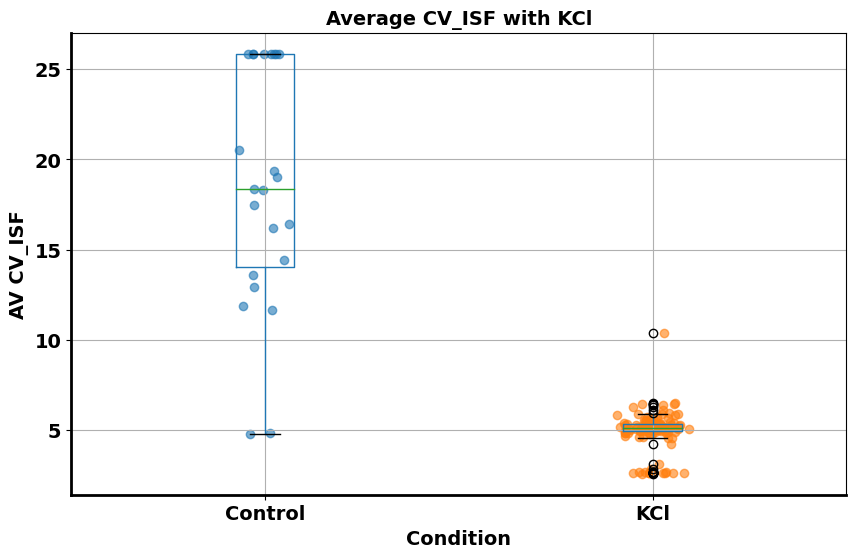

In [52]:
#Av SC_ISF per Cell -> CV = SD/AV out of Data from Graph 3 (Graph 4)

data = pd.read_csv(r'D:\zeiss\Desktop\charlotte\240501 HA GCaMP6f activity with blockers\final_prediction_files/predictions_deltaF_5.csv')
data2 = pd.read_csv(r'D:\zeiss\Desktop\charlotte\240501 HA GCaMP6f activity with blockers\final_prediction_files\predictions_deltaF_KCl_5.csv')

# Calculate standard deviation for each row in the original datasets
row_std_data = data.std(axis=1)
row_std_data2 = data2.std(axis=1)

processed_sums_data = data.sum(axis=1) / 598
processed_sums_data2 = data2.sum(axis=1) / 598


# Calculate the coefficient of variation for each row
cv_data = row_std_data / processed_sums_data
cv_data2 = row_std_data2 / processed_sums_data2


# Optionally, add these as new columns to the original dataframes
data['CV'] = cv_data
data2['CV'] = cv_data2


combined_data = pd.DataFrame({
    'Control': data['CV'],
    'KCl': data2['CV']

})

plt.figure(figsize=(10, 6))
boxplot = combined_data.boxplot() 

# Add scatter plot on top of boxplot for each set of data
for i, col in enumerate(combined_data.columns):
    y = combined_data[col].dropna()  # Drop NA values to ensure clean plotting
    x = np.random.normal(i + 1, 0.04, size=len(y))  
    plt.scatter(x, y, alpha=0.6) 

plt.title('Average CV_ISF with KCl', fontweight='bold', fontsize=14)
plt.ylabel('AV CV_ISF', fontweight='bold', fontsize=14)
plt.xlabel('Condition',fontweight='bold', fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=14)
plt.show()


In [79]:
parent_folder = r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files'

data = []

for root, dir, files in os.walk(parent_folder):
    for dir = 'bic_HA':
        data.append(files)
print(data)


SyntaxError: invalid syntax (3145044792.py, line 6)

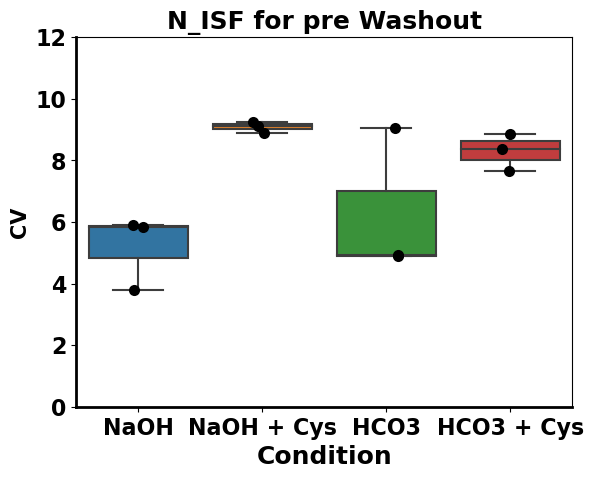

In [140]:
#N_ISF New

base_dir = r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\washout'

file_names = [
    'washout NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well001_prediction.csv',
    'washout NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well005_prediction.csv',
    'washout NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well009_prediction.csv',
    
    'washout NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well002_prediction.csv',
    'washout NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well006_prediction.csv',
    'washout NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well010_prediction.csv',
    
    'washout HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well003_prediction.csv',
    'washout HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well007_prediction.csv',
    'washout HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well011_prediction.csv',

    'washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well004_prediction.csv',
    'washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well008_prediction.csv',
    'washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well012_prediction.csv',
]


def read_files(base_dir, file_names):
    data = []
    for file_name in file_names:
        file_path = os.path.join(base_dir, file_name)
        df = pd.read_csv(file_path)
        # Ensure the data is numeric
        df = df.apply(pd.to_numeric, errors='coerce')
        data.append(df)
    return data

def calculate_coefficient_of_variation(df):
    # Calculate CV for each column, drop NaNs and take the mean of CVs across all columns
    cv_values = df.std(axis=0, skipna=True) / df.mean(axis=0, skipna=True)
    return cv_values.mean()

def get_condition(file_name):
    if 'Cys' in file_name:
        if 'NaOH' in file_name:
            return 'NaOH + Cys'
        elif 'HCO3' in file_name:
            return 'HCO3 + Cys'
    else:
        if 'NaOH' in file_name:
            return 'NaOH'
        elif 'HCO3' in file_name:
            return 'HCO3'

def process_data(data, file_names):
    results = []
    for df, file_name in zip(data, file_names):
        cv = calculate_coefficient_of_variation(df)
        condition = get_condition(file_name)
        results.append({'Condition': condition, 'CV': cv})
    return pd.DataFrame(results)

data = read_files(base_dir, file_names)
df_results = process_data(data, file_names)

sns.boxplot(x='Condition', y='CV', data=df_results)
sns.stripplot(x='Condition', y='CV', data=df_results, color='black', size=8, jitter=True)

plt.title('N_ISF for pre ', fontweight='bold', fontsize=18)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('CV', fontweight='bold', fontsize=15)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=16)
plt.ylim([0, 12])
plt.show()

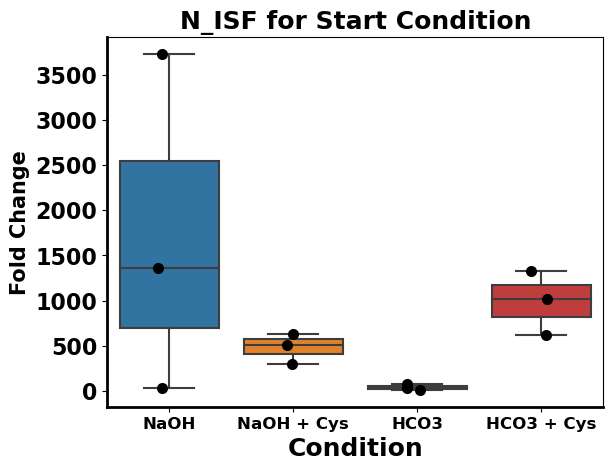

In [128]:
#N_ISF for Graph 5
#Boxplot with AV Estm. Spikes for each well per Sample (3 wells per sample = 3 data points) 
#should be one of the final graphs
base_dir = r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start'

file_names = [
    'experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well001_prediction.csv',
    'experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well005_prediction.csv',
    'experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well009_prediction.csv',
    
    'experiment start NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well002_prediction.csv',
    'experiment start NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well006_prediction.csv',
    'experiment start NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well010_prediction.csv',
    
    'experiment start HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well003_prediction.csv',
    'experiment start HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well007_prediction.csv',
    'experiment start HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well011_prediction.csv',

    'experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well004_prediction.csv',
    'experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well008_prediction.csv',
    'experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well012_prediction.csv',
]

def read_files(base_dir, file_names):
    data = []
    for file_name in file_names:
        file_path = f"{base_dir}/{file_name}"
        df = pd.read_csv(file_path)
        data.append(df)
    return data

def calculate_file_average(df):
    average_row_sum = df.sum(axis=1).mean()
    total_column_sum = df.sum(axis=0).sum()
    return (average_row_sum + total_column_sum) / 2

def process_data(data, file_names):
    results = []
    for df, file_name in zip(data, file_names):
        average = calculate_file_average(df)
        condition = get_condition(file_name)
        results.append({'Condition': condition, 'Value': average})
    return pd.DataFrame(results)


def get_condition(file_name):
    if 'Cys' in file_name:
        if 'NaOH' in file_name:
            return 'NaOH + Cys'
        elif 'HCO3' in file_name:
            return 'HCO3 + Cys'
    else:
        if 'NaOH' in file_name:
            return 'NaOH'
        elif 'HCO3' in file_name:
            return 'HCO3'
        
data = read_files(base_dir, file_names)
df_results = process_data(data, file_names)

sns.boxplot(x='Condition', y='Value', data=df_results)
sns.stripplot(x='Condition', y='Value', data=df_results, color='black', size=8, jitter=True)

plt.title('N_ISF for Start Condition', fontweight='bold', fontsize=18)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Fold Change', fontweight='bold', fontsize=15)
#plt.ylim([0, 2])
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12)
plt.show()

In [174]:
#CV per Well, sum rows add sums together, and divide by number of cells -> that divide by average and convert it to spikes per minute
#Graph 5

base_dir = r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files'

file_names = [
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_1.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_2.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_3.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_ncys_4.csv',
    
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_1.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_2.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_3.csv',
    'no_bicarbonate_acute/predictions_deltaF_nbic_cys_4.csv',
    
    'bicarbonate_acute/predictions_deltaF_bic_ncys_4.csv',
    'bicarbonate_acute/predictions_deltaF_bic_ncys_3.csv',
    'bicarbonate_acute/predictions_deltaF_bic_ncys_2.csv',
    'bicarbonate_acute/predictions_deltaF_bic_ncys_1.csv',

    'bicarbonate_acute/predictions_deltaF_bic_cys_1.csv',
    'bicarbonate_acute/predictions_deltaF_bic_cys_2.csv',
    'bicarbonate_acute/predictions_deltaF_bic_cys_3.csv',
    'bicarbonate_acute/predictions_deltaF_bic_cys_4.csv',
]
average_data_list = []
row_sum_data_list = []
overall_average_data_list = []

for data in data_list:
    average_data = data.sum(axis=1).mean()
    average_data_list.append(average_data)

# Number of rows with values for each dataset
num_rows_data = [484, 661, 345, 320, 836, 552, 202, 428, 498, 619, 482, 330, 358, 331, 211, 290]
#num_rows_data2 = 130
#num_rows_data3 = 148
#num_rows_data4 = 140
#num_rows_data5 = 152
#num_rows_data6 = 150
#num_rows_data7 = 122
#num_rows_data8 = 238
##num_rows_data9 = 250
#num_rows_data10 = 216
#num_rows_data11 = 150
#num_rows_data12 = 198

for data in data_list:
    row_sum_data = data.sum(axis=1).sum() / num_rows_data 
    row_sum_data_list.append(row_sum_data)
# Calculate the sum of each row and divide by the number of rows with values

for data in row_sum_data_list:
    overall_average = data.mean().mean()
    overall_average_data_list.append(overall_average)

##########################################################
# Divide the average row sum by the overall average for each dataset
Well1 = row_sum1_div_rows / overall_average1
Well2 = row_sum2_div_rows / overall_average2
Well3 = row_sum3_div_rows / overall_average3
Well4 = row_sum1_div_rows / overall_average4
Well5 = row_sum2_div_rows / overall_average5 
Well6 = row_sum3_div_rows / overall_average6
Well7 = row_sum2_div_rows / overall_average5
Well8 = row_sum3_div_rows / overall_average6
Well9 = row_sum2_div_rows / overall_average5 
Well10 = row_sum3_div_rows / overall_average6
Well11 = row_sum2_div_rows / overall_average5
Well12 = row_sum3_div_rows / overall_average6

normalized_Well1 = Well1
normalized_Well2 = Well2
normalized_Well3 = Well3
normalized_Well4 = Well4
normalized_Well5 = Well5
normalized_Well6 = Well6
normalized_Well7 = Well7
normalized_Well8 = Well8
normalized_Well9 = Well9
normalized_Well10 = Well10
normalized_Well11 = Well11
normalized_Well12 = Well12

data = {
    'Condition': ['1% FBS Hibernate', '1% FBS Hibernate', '1% FBS Gabazine', '1% FBS Gabazine', '1% FBS Gabazine', '1% FBS Gabazine', '2% FBS Hibernate', '2% FBS Hibernate', '2% FBS Gabazine', '2% FBS Gabazine', '2% FBS Gabazine', '2% FBS Gabazine'],
    'Value': [normalized_Well1, normalized_Well2, normalized_Well3, normalized_Well4, normalized_Well5, normalized_Well6, normalized_Well7, normalized_Well8, normalized_Well9, normalized_Well10, normalized_Well11, normalized_Well12]
}

df = pd.DataFrame(data)

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()

plt.title('CV_NISF per Condition', fontweight='bold', fontsize=18)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.gca().spines['bottom'].set_linewidth(2) 
plt.gca().spines['left'].set_linewidth(2)    
plt.yticks(fontweight='bold', fontsize=16)
plt.ylabel('off')
plt.xticks(fontweight='bold', fontsize=9)
plt.gca().set_ylabel('')
plt.show()

NameError: name 'row_sum1_div_rows' is not defined

In [ ]:
# Calculate the sum of each row and divide by the number of non-NaN rows
row_sum1 = data.sum(axis=1).mean()  # Sum each row, then calculate average of these sums
row_sum2 = data2.sum(axis=1).mean()
row_sum3 = data3.sum(axis=1).mean()
row_sum4 = data4.sum(axis=1).mean()  # Sum each row, then calculate average of these sums
row_sum5 = data5.sum(axis=1).mean()
row_sum6 = data6.sum(axis=1).mean()
row_sum7 = data7.sum(axis=1).mean()
row_sum8 = data8.sum(axis=1).mean()
row_sum9 = data9.sum(axis=1).mean()
row_sum10 = data10.sum(axis=1).mean()
row_sum11 = data11.sum(axis=1).mean()
row_sum12 = data12.sum(axis=1).mean()

row_sum1_div_rows = data.sum(axis=1).sum() / num_rows_data  # Sum each row, sum these and then divide by the number of rows with values
row_sum2_div_rows = data2.sum(axis=1).sum() / num_rows_data2
row_sum3_div_rows = data3.sum(axis=1).sum() / num_rows_data3
row_sum4_div_rows = data4.sum(axis=1).sum() / num_rows_data4  
row_sum5_div_rows = data5.sum(axis=1).sum() / num_rows_data5
row_sum6_div_rows = data6.sum(axis=1).sum() / num_rows_data6
row_sum7_div_rows = data7.sum(axis=1).sum() / num_rows_data7
row_sum8_div_rows = data8.sum(axis=1).sum() / num_rows_data8
row_sum9_div_rows = data9.sum(axis=1).sum() / num_rows_data9
row_sum10_div_rows = data10.sum(axis=1).sum() / num_rows_data10
row_sum11_div_rows = data11.sum(axis=1).sum() / num_rows_data11
row_sum12_div_rows = data12.sum(axis=1).sum() / num_rows_data12

# Calculate the overall average of each DataFrame
overall_average1 = data.mean().mean()  # Calculate the mean of each column, then the mean of those means
overall_average2 = data2.mean().mean()
overall_average3 = data3.mean().mean()
overall_average4 = data4.mean().mean()  
overall_average5 = data5.mean().mean()
overall_average6 = data6.mean().mean()
overall_average7 = data7.mean().mean()
overall_average8 = data8.mean().mean()
overall_average9 = data9.mean().mean()
overall_average10 = data10.mean().mean()
overall_average11 = data11.mean().mean()
overall_average12 = data12.mean().mean()

TypeError: object of type 'numpy.float64' has no len()

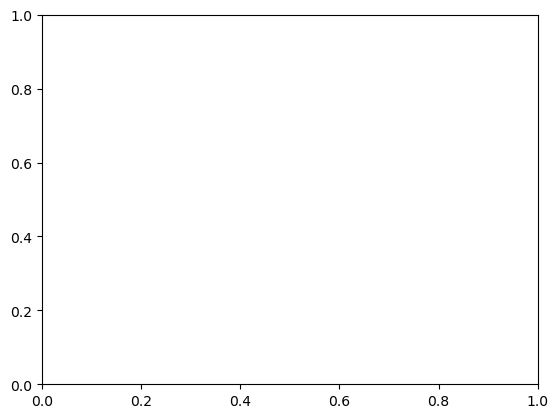

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_list = pd.read_csv(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files/predictions_deltaF_1FBS_Hiber_1.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_1FBS_Hiber_2.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_1FBS_Gaba_1.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_1FBS_Gaba_2.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_1FBS_Gaba_3.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_1FBS_Gaba_4.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files/predictions_deltaF_2FBS_Hiber_1.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Hiber_2.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Gaba_1.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Gaba_2.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Gaba_3.csv'),
(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Gaba_4.csv')

data_dicts = [data, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12]


# Calculate the sum of each row and divide by the number of rows with values
num_rows_data_list = [119, 134, 119, 106, 156, 74, 156, 74, 156, 119, 156, 74]
normalized_values = []
num_rows_data_list = [len(df) for df in data_list]

for df in data_list:
    row_sum_div_rows = df.sum(axis=1).sum() / num_rows_data_list[data_list.index(df)]
    overall_average = df.mean().mean()
    well = row_sum_div_rows / overall_average
    normalized_values.append(well)

# Assign the normalized values to the corresponding dataframes
for i, df in enumerate(data_list):
    data_list[i]["normalized_value"] = normalized_values[i]


plt.boxplot(normalized_values[0])
plt.legend(loc='upper right')
plt.title('Histogram of Normalized Values')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.show()


In [70]:
#predictions/deltaF files to CSV!!! CONVERT BEFORE USING
#maybe improve folder structure

import numpy as np
import pandas as pd

df1 = np.load(r"D:\zeiss\Desktop\rotation_stud\240322 DMEM high pH acute toxicity\pH_results\pre_high_pH\240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well007\suite2p\plane0\deltaF.npy")

# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(df1)

# Save the DataFrame to a CSV file
filepath = (r"D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\df_exp_pre_high_well007.csv")
df.to_csv(filepath, index=False)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
594    0.0
595    0.0
596    0.0
597    0.0
598    0.0
Length: 599, dtype: float64


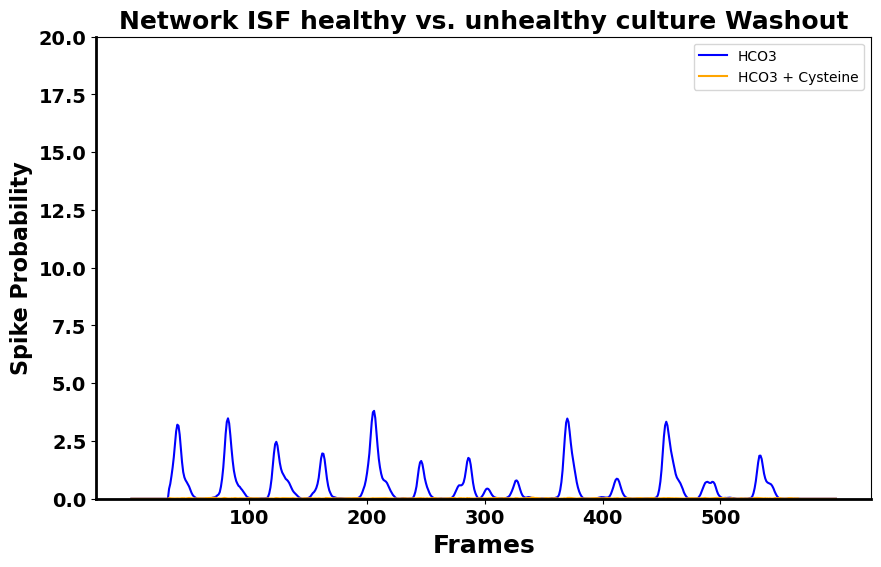

In [117]:
#Calculate sum for each frame (per Well) and plotting it into NISF via T (frames)
#Graph 6

import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv(r"C:\processing\240322 HCO3 vs NaOH\final_prediction_files\washout\washout HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well003_prediction.csv")
data2 = pd.read_csv(r"C:\processing\240322 HCO3 vs NaOH\final_prediction_files\washout\washout HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_washout_well004_prediction.csv")


# Concatenate the dataframes vertically (make sure they have the same columns)
all_data = pd.concat([data], axis=0)
all_data2 = pd.concat([data2], axis=0)

# Calculate the sum of each column across all concatenated DataFrames
total_column_sums = all_data.sum()
total_column_sums2 = all_data2.sum()

# Display the sums for each column
print(total_column_sums)

plt.figure(figsize=(10, 6))  # Set the figure size (optional)
total_column_sums.plot(kind='line', linestyle='-', color='blue')  # Create a line plot
total_column_sums2.plot(kind='line', linestyle='-', color='orange')  # Create a line plot
plt.title('Network ISF healthy vs. unhealthy culture Washout', fontweight='bold', fontsize=18)  # Title of the plot
plt.xlabel('Frames', fontweight='bold', fontsize=18)  # X-axis label
plt.xticks([100, 200, 300, 400, 500], fontweight='bold', fontsize=14)
plt.ylabel('Spike Probability', fontweight='bold', fontsize=16)  # Y-axis label
plt.ylim([0, 20])
plt.yticks(fontweight='bold', fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.legend(['HCO3', 'HCO3 + Cysteine'])
plt.show()



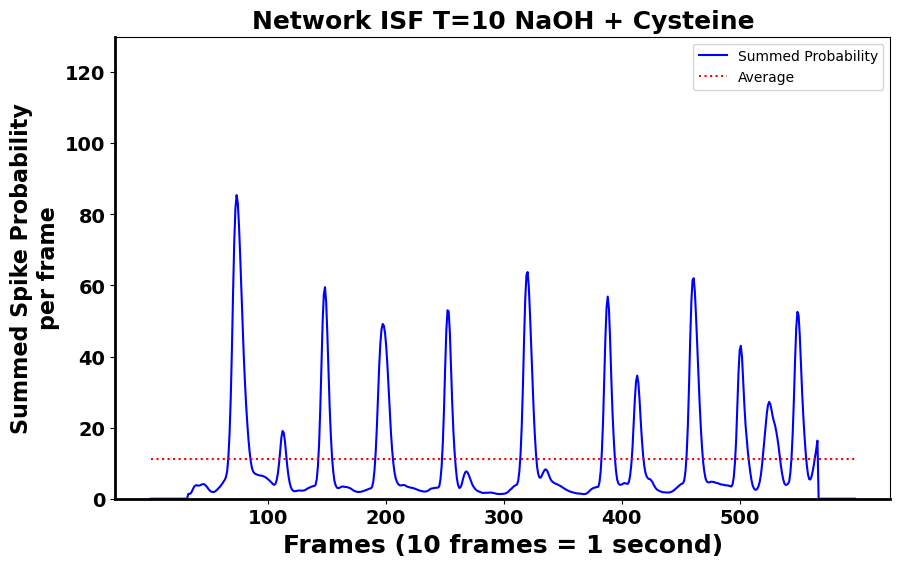

In [93]:
#Network ISF


data = pd.read_csv(r"C:\processing\charlotte HCO3 NaOH exp\240506 HCO Cysteine relationship ph 7,6\final_prediction_files\no_bic_acute\predictions_deltaF_nbic_cys_2.csv")

all_data = pd.concat([data], axis=0)
total_column_sums = all_data.sum()
average = total_column_sums.mean()

plt.figure(figsize=(10, 6))  # Set the figure size (optional)
total_column_sums.plot(kind='line', linestyle='-', color='blue')  # Create a line plot
plt.plot(total_column_sums.index, [average] * len(total_column_sums), linestyle=':', color='red', label='Average')

plt.title('Network ISF T=10 NaOH + Cysteine', fontweight='bold', fontsize=18)  
plt.xlabel('Frames (10 frames = 1 second)', fontweight='bold', fontsize=18) 
plt.xticks([100, 200, 300, 400, 500], fontweight='bold', fontsize=14)
plt.ylabel('Summed Spike Probability\nper frame', fontweight='bold', fontsize=16) 
plt.yticks(fontweight='bold', fontsize=14)
plt.ylim([0, 130])
plt.gca().spines['bottom'].set_linewidth(2)  
plt.gca().spines['left'].set_linewidth(2)
plt.legend(['Summed Probability', 'Average'])
plt.show()

In [ ]:
# import pynapple as nap
def pynapple_plots(file_path, output_directory):#, video_label):
    import warnings
    warnings.filterwarnings('ignore')
    
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    df_cell_stats = data['cell_stats']
    
    
    my_tsd = {}
    for idx in df_cell_stats['SynapseID'][0:]:
        my_tsd[idx] = nap.Tsd(t=df_cell_stats[df_cell_stats['SynapseID']==idx]['PeakTimes'][idx],
                            d=df_cell_stats[df_cell_stats['SynapseID']==idx]['Amplitudes'][idx],time_units='s')
        
    Interval_1 = nap.IntervalSet(0,180)

    # Interval_2 = nap.IntervalSet(250,290)
    # Interval_3 = nap.IntervalSet(290,450)
    
    interval_set = [Interval_1]#,
                #Interval_2]
    
    #Make the figure
    plt.figure(figsize=(6,6))
    plt.subplot(2,1,1)
    for i, idx in enumerate(df_cell_stats['SynapseID']):
#     
        plt.eventplot(df_cell_stats[df_cell_stats['SynapseID']==idx]['PeakTimes'],lineoffsets=i,linelength=0.8)
#     
        plt.ylabel('SynapseID')
        plt.xlabel('Time (s)')
        plt.tight_layout()
    plt.subplot(2,1,2)
    for i in range(1): #change range for multiple intervals
        # plt.title(file_path)
        # plt.title(f'interval {i+1}')
        for idx in my_tsd.keys():
            plt.plot(my_tsd[idx].restrict(interval_set[i]).index,my_tsd[idx].restrict(interval_set[i]).values,color=f'C{idx}',marker='o',ls='',alpha=0.5)
        plt.ylabel('Amplitude')
        plt.ylim(0,600)
        plt.xlabel('Spike time (s)')
        plt.tight_layout()

    base_file_name = os.path.splitext(os.path.basename(file_path))[0]
    
    #Check if output 
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    figure_output_path = os.path.join(output_directory, f'{base_file_name}_figure.png')

    plt.savefig(figure_output_path)
    plt.show()

            ## You can then just group the amplitude as you want for later analysis

    transient_count = []
    for idx in my_tsd.keys():
        transient_count.append(my_tsd[idx].restrict(interval_set[0]).shape[0])

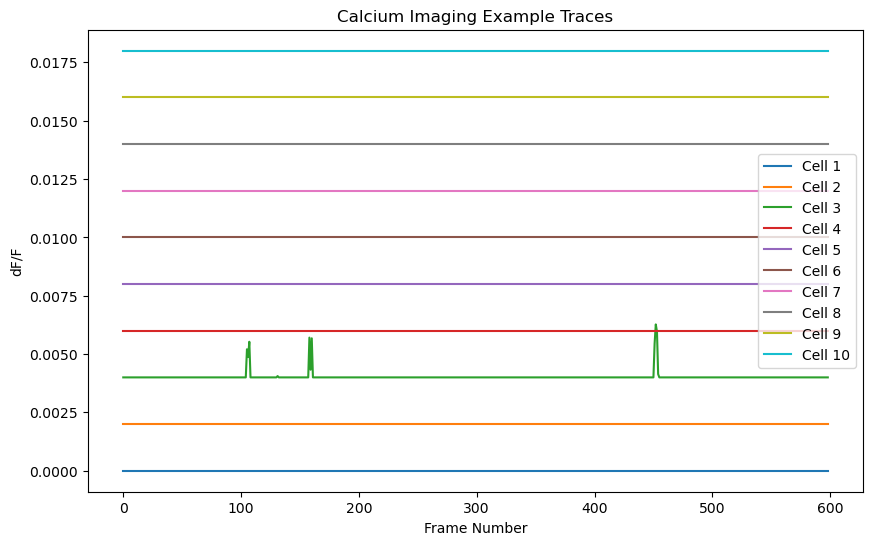

In [200]:
# Plt Prediction traces as a function try 1
def plot_prediction_traces(data, offset=0.002):
    """
    Plots each row of the data on a separate y-offset.
    Args:
    - data: 2D numpy array, where each row is a trace to plot
    - offset: The offset to apply between each trace
    """
    plt.figure(figsize=(10, 6))

    # Plot each trace, offsetting each by a constant amount
    for i, trace in enumerate(data):
        plt.plot(trace + i * offset, label=f'Cell {i+1}')

    plt.xlabel('Frame Number')
    plt.ylabel('dF/F')
    plt.title('Calcium Imaging Example Traces')
    plt.legend()
    plt.show()

# Call the function to plot the traces
sample = data.sample(n=10, random_state=42)

plot_prediction_traces(sample.values)



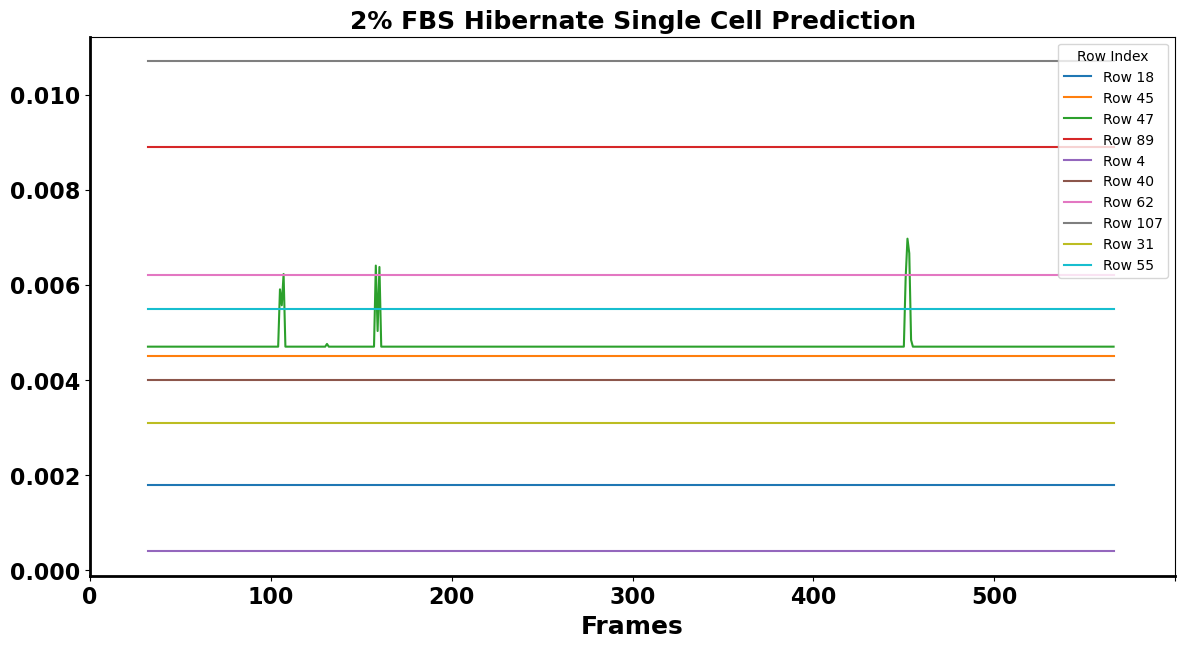

In [ ]:
def plot_traces(file_path, num_samples = 10, random_state = 42, offset=0.0001):
    """
    Plots each row of the data on a separate y-offset.
    Args:
    - data: 2D numpy array, where each row is a trace to plot
    - offset: The offset to apply between each trace
    """

    data = pd.read_csv(file_path)
    random_rows = data.sample(n=num_samples, random_state=random_state)
    plt.figure(figsize=(14,7))

    # Plot each trace, offsetting each by a constant amount

    
    for index, row in random_rows.iterrows():
        plt.plot(row.index, row.values + index * offset, linestyle='-', label=f'Row {index}')
    
    plt.title('2% FBS Hibernate Single Cell Prediction', fontweight='bold', fontsize=18)
    plt.xlabel('Frames', fontweight='bold', fontsize=18)
    plt.xticks([0, 100, 200, 300, 400, 500, 600], fontweight='bold', fontsize=16)
    plt.yticks(fontweight='bold', fontsize=16)

    # Customize axis appearance
    plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
    plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis

    plt.legend(title='Row Index')
    plt.show()

plot_traces(r'D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Hiber_1.csv')

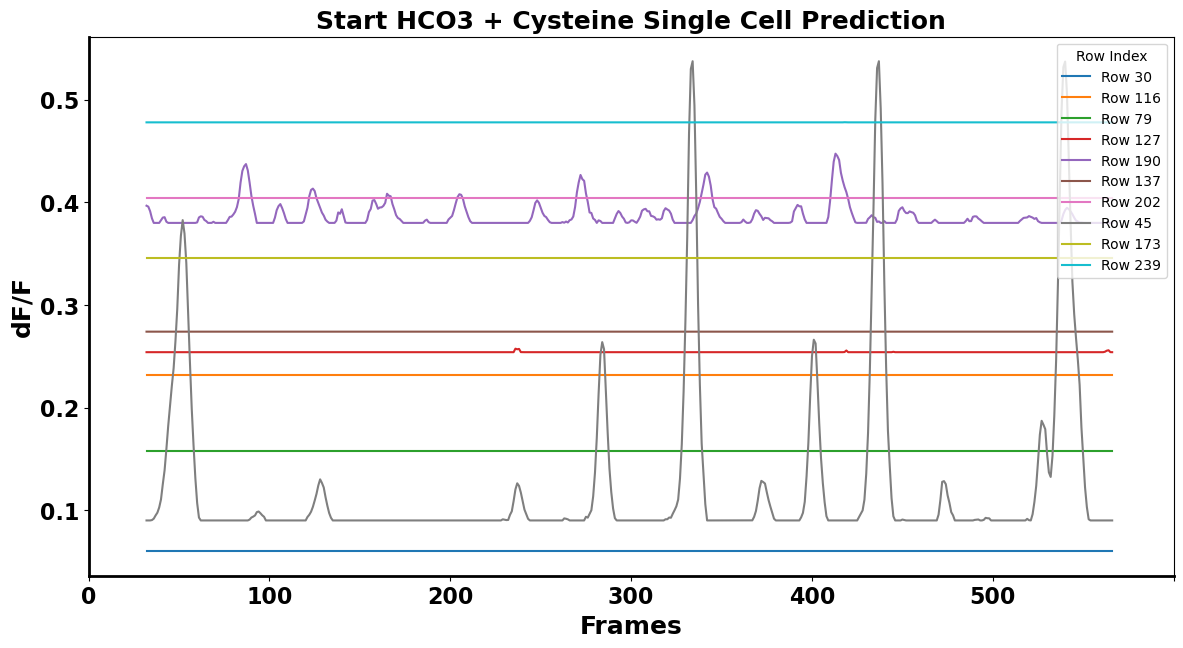

In [123]:
#Single Cell ISF for one condition -> use predictons file
#Neuron 44

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well004_prediction.csv')

# List of row indices to extract
#row_indices = [10,15,18,33,26,44,58,63,75,97]
#average_values = [data.iloc[[row_index]].mean().mean() for row_index in row_indices]

# Randomly select 10 rows from the DataFrame
random_rows = data.sample(n=10, random_state=42)  # 'random_state' for reproducibility

plt.figure(figsize=(14, 7))

# You can plot each row as a separate line in a line plot
offset = 0.002

for index, row in random_rows.iterrows():
    plt.plot(row.index, row.values + index * offset, linestyle='-', label=f'Row {index}') #marker='o' just row_values for displaying it without offset
plt.title('Start HCO3 + Cysteine Single Cell Prediction', fontweight='bold', fontsize=18)
plt.xlabel('Frames', fontweight='bold', fontsize=18)
plt.xticks([0, 100, 200, 300, 400, 500, 600], fontweight='bold', fontsize=16)
plt.yticks(fontweight='bold', fontsize=16)
#plt.ylim([0, 1.6])
plt.ylabel('dF/F', fontweight='bold', fontsize=18)
plt.legend(title='Row Index')
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.show()


#we want to set y axis to 1_10 (fixed scale bar) for each cell as a like cell count value and right next to graph a separate scale bar 
#maybe the distance between the graphs is too wide, especially on the top

TypeError: unhashable type: 'numpy.ndarray'

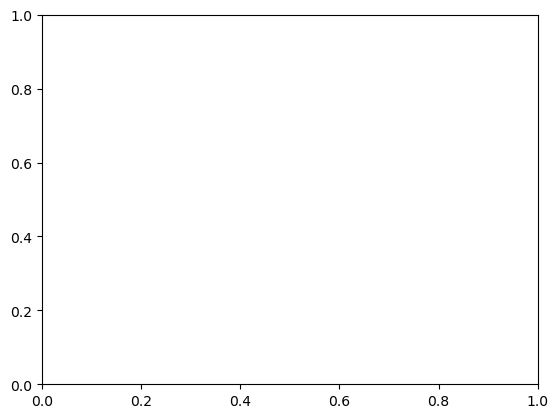

In [121]:
#Single Cell ISF for one condition -> use predictons file
#Neuron 44

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

csv_file = pd.read_csv(r'D:\zeiss\Desktop\charlotte\240501 HA GCaMP6f activity with blockers\final_prediction_files\predictions_deltaF_8.csv')

# Select 10 random rows
lines = [tuple(line for line in csv.reader(csv_file))]
n = 10
random_rows = random.choices(lines, k=n)
chosen_values = [random.choice(row) for row in random_rows]
#df.head(n=10)

# Plot the data
plt.plot(chosen_values)
plt.xlabel('Column 0')
plt.ylabel('Values')
plt.title('Random Rows from CSV File')
plt.show()

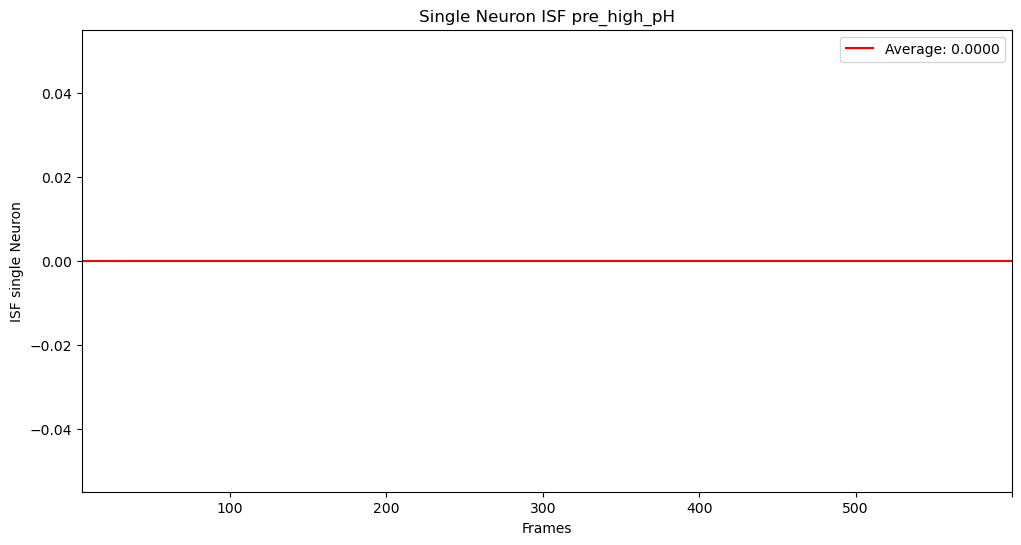

In [119]:
#Single Neuron for one condition -> use prediction file
#Neuron 44

#Single Cell ISF pre_normal_pH
#Neuron 44

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\predictions_240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_exp_end_well003.csv')

average_value = row_data.mean()

# Check if the specified row index exists in the DataFrame
if 44 < len(data):
    # Extract the specific row (row 44)
    row_data = data.iloc[44]

    # Create a plot
    plt.figure(figsize=(12, 6))
    plt.plot(row_data.index, row_data.values, linestyle='-', color='orange')  # Line plot
    plt.title('Single Neuron ISF pre_high_pH')
    plt.xlabel('Frames')
    plt.ylabel('ISF single Neuron')
     # Set specific y-axis ticks
    plt.xticks([100, 200, 300, 400, 500, 600])

 # Plot a horizontal line at the average value
    plt.axhline(y=average_value, color='r', linestyle='-', label=f'Average: {average_value:.4f}')
    plt.legend()  # Display legend to show what the line represents

    plt.show()
else:
    print(f"Row 44 does not exist. The DataFrame only has {len(data)} rows.")

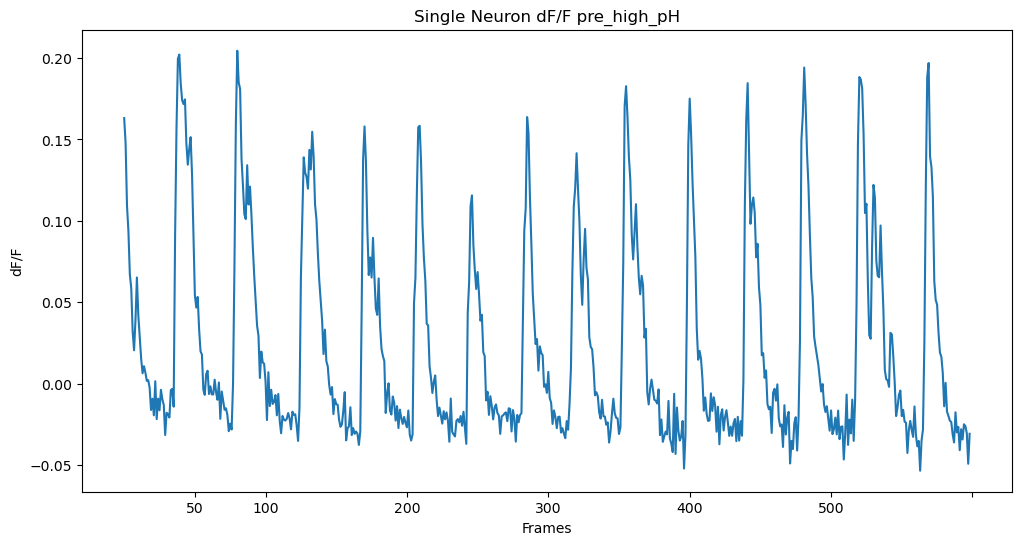

In [42]:
#deltaF Single Cell -> use delta F file
#Neuron 44 high_pH

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\df_high_pH_Well3.csv')

# Check if the specified row index exists in the DataFrame
if 44 < len(data):
    # Extract the specific row (row 44)
    row_data = data.iloc[44]

    # Create a plot
    plt.figure(figsize=(12, 6))
    plt.plot(row_data.index, row_data.values, linestyle='-')  # Line plot
    plt.title('Single Neuron dF/F pre_high_pH')
    plt.xlabel('Frames')
    plt.ylabel('dF/F')
     # Set specific y-axis ticks
    plt.xticks([100, 200, 300, 400, 500, 600])


    plt.show()
else:
    print(f"Row 44 does not exist. The DataFrame only has {len(data)} rows.")

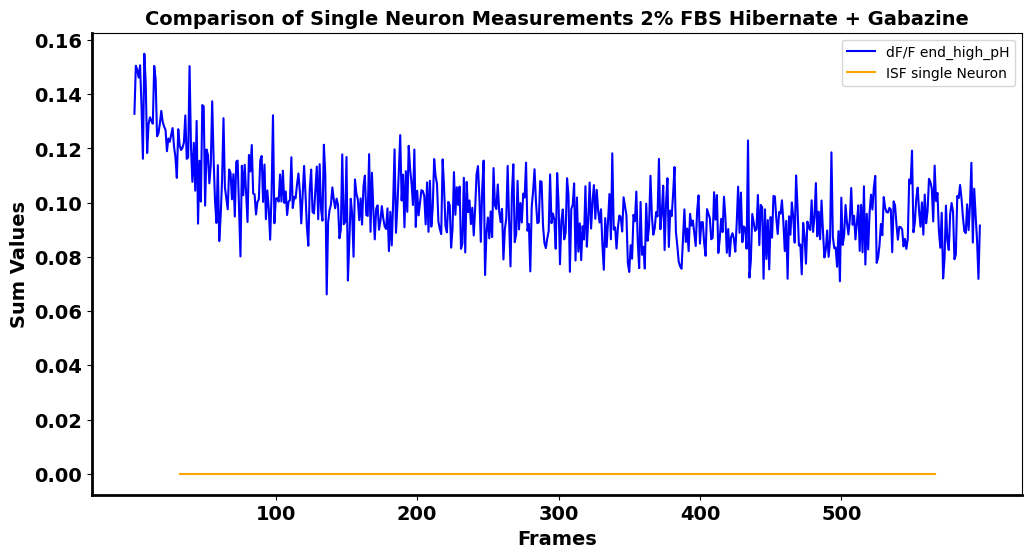

In [78]:
#Plotting dF/F and ISF together just like CASCADE Figure
#Graph 6

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
data1 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_deltaF_files\deltaF_2F_G_3.csv")
data2 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Gaba_3.csv")

# Check if the specified row index exists in both DataFrames
if 44 < len(data1) and 44 < len(data2):
    # Extract the specific row (row 44) from both DataFrames
    row_data1 = data1.iloc[44]
    row_data2 = data2.iloc[44]

    #modified_row_data2 = row_data2.iloc[32:-32]  # This slices the data to exclude the first and last 32 elements
    
    vertical_shift = 0.1  # Adjust this value as needed to shift the blue graph
    #horizontal_shift = 10

    # Create a plot
    plt.figure(figsize=(12, 6))
    
    # Plot data from the first DataFrame
    plt.plot(row_data1.index, row_data1.values + vertical_shift, linestyle='-', color='blue', label='dF/F end_high_pH')
    
    # Plot data from the second DataFrame
    plt.plot(row_data2.index, row_data2.values, linestyle='-', color='orange', label='ISF single Neuron')
    
    # Title and labels
    plt.title('Comparison of Single Neuron Measurements 2% FBS Hibernate + Gabazine', fontweight='bold', fontsize=14)
    plt.xlabel('Frames', fontsize=14)
    plt.ylabel('Measurement', fontsize=14)
    plt.xticks([100, 200, 300, 400, 500], fontweight='bold',fontsize=14)
    plt.xlabel('Frames', fontweight='bold',fontsize=14)
    plt.ylabel('Sum Values', fontweight='bold', fontsize=14)
    #plt.ylim([-0.1, 0.200])
    plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
    plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
    plt.yticks(fontweight='bold', fontsize=14)
    
    # Show legend
    plt.legend()

    plt.show()
else:
    print(f"Row 44 does not exist in one or both DataFrames. Data1 has {len(data1)} rows, Data2 has {len(data2)} rows.")

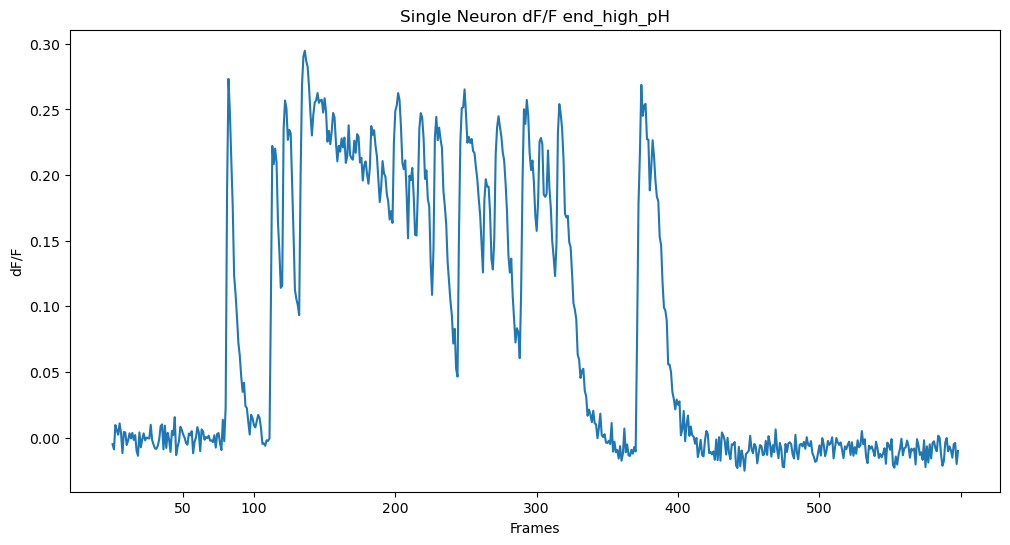

In [83]:
#deltaF Single Cell use deltaF file
#Neuron 44 normal_pH

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\prediction_df_csv_converted\df_end_high_pH_well003.csv')

# Check if the specified row index exists in the DataFrame
if 44 < len(data):
    # Extract the specific row (row 44)
    row_data = data.iloc[44]

    # Create a plot
    plt.figure(figsize=(12, 6))
    plt.plot(row_data.index, row_data.values, linestyle='-')  # Line plot
    plt.title('Single Neuron dF/F end_high_pH')
    plt.xlabel('Frames')
    plt.ylabel('dF/F')
     # Set specific y-axis ticks
    plt.xticks([100, 200, 300, 400, 500, 600])


    plt.show()
else:
    print(f"Row 44 does not exist. The DataFrame only has {len(data)} rows.")

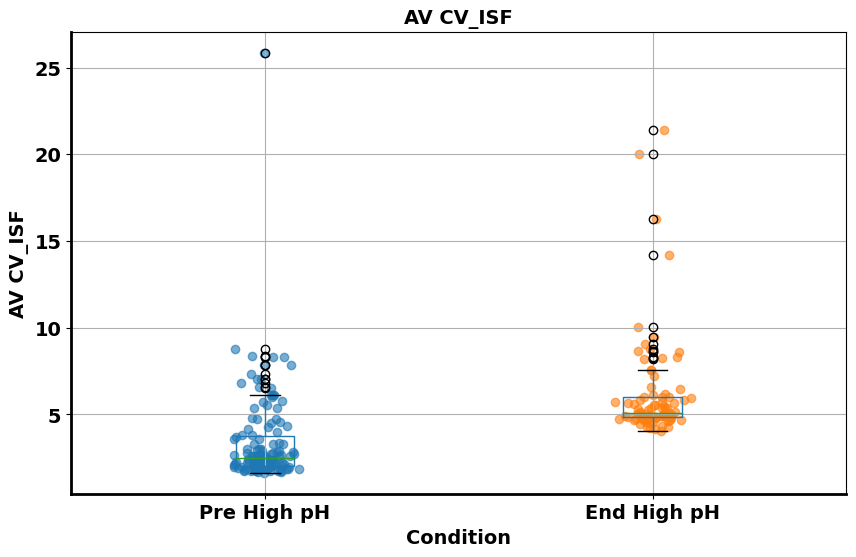

In [47]:
#Code for tunring it into HTML

import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
from io import BytesIO
import os

data = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\Charlotte\prediction_df_csv_converted/predictions_high_pH_Well7.csv')
data2 = pd.read_csv(r'D:\zeiss\Desktop\rotation_stud\Charlotte\prediction_df_csv_converted\prediction_exp_end_high_well007.csv')

# Calculate standard deviation for each row in the original datasets
row_std_data = data.std(axis=1)
row_std_data2 = data2.std(axis=1)

processed_sums_data = data.sum(axis=1) / 598
processed_sums_data2 = data2.sum(axis=1) / 598

# Calculate the coefficient of variation for each row
cv_data = row_std_data / processed_sums_data
cv_data2 = row_std_data2 / processed_sums_data2

# Optionally, add these as new columns to the original dataframes
data['CV'] = cv_data
data2['CV'] = cv_data2

combined_data = pd.DataFrame({
    'Pre High pH': data['CV'],
    'End High pH': data2['CV']
})

# Set the output file path and format
file_path = pathlib.Path('output.svg')  # Set the file name and path here


# Create the plot
fig = plt.figure(figsize=(10, 6))
boxplot = combined_data.boxplot() 

# Add scatter plot on top of boxplot for each set of data
for i, col in enumerate(combined_data.columns):
    y = combined_data[col].dropna()  # Drop NA values to ensure clean plotting
    x = np.random.normal(i + 1, 0.04, size=len(y))  
    plt.scatter(x, y, alpha=0.6) 

plt.title('AV CV_ISF', fontweight='bold', fontsize=14)
plt.ylabel('AV CV_ISF', fontweight='bold', fontsize=14)
plt.xlabel('Condition',fontweight='bold', fontsize=14)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=14)

plt.savefig('test.png')

tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html_file_path = os.path.join('D:\\zeiss\\Desktop\\rotation_stud\\HTML output Python', 'test.html')
html = '<img src=\'data:image/png;base64,{}\'>'.format(encoded)

with open('test.html','w') as f:
    f.write(html)





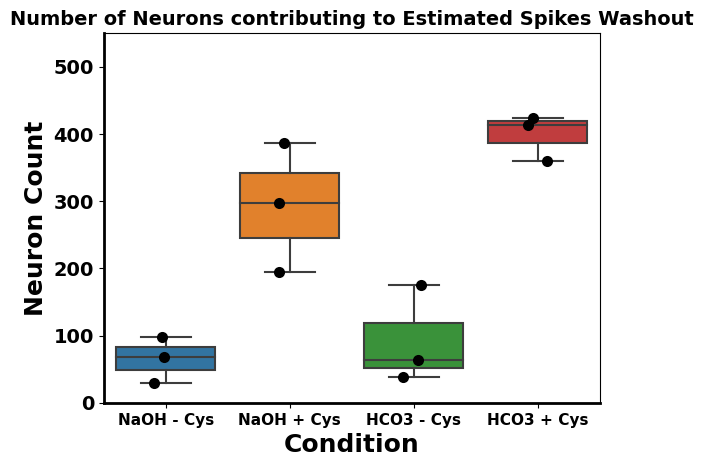

In [46]:
#How many cells do fire for Estim. Spikes Graph
#use overview file

data = pd.read_csv(r"C:\processing\240322 HCO3 vs NaOH\overview.csv")

data = {
    'Condition': [ 'NaOH - Cys', 'NaOH - Cys', 'NaOH - Cys', 'NaOH + Cys','NaOH + Cys', 'NaOH + Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys'],
    'Value': [
30,
68,
98,
194,
297,
387,
63,
39,
175,
424,
414,
359,
]
}

df = pd.DataFrame(data)

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()
plt.title('Number of Neurons contributing to Estimated Spikes Washout', fontweight='bold', fontsize=14)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Neuron Count', fontweight='bold', fontsize=18)
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.ylim([0, 550])
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=11)
plt.show()

{'Condition': ['NaOH - Cys', 'NaOH - Cys', 'NaOH - Cys', 'NaOH + Cys', 'NaOH + Cys', 'NaOH + Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys'], 'Value': [0.5493103448275862, 7.383111111111111, 6.909999999999999, 2.6194594594594593, 2.6061363636363635, 5.253571428571428, 2.978780487804878, 2.058611111111111, 7.14675, 1.0, 3.0327906976744186, 5.7989655172413785]}


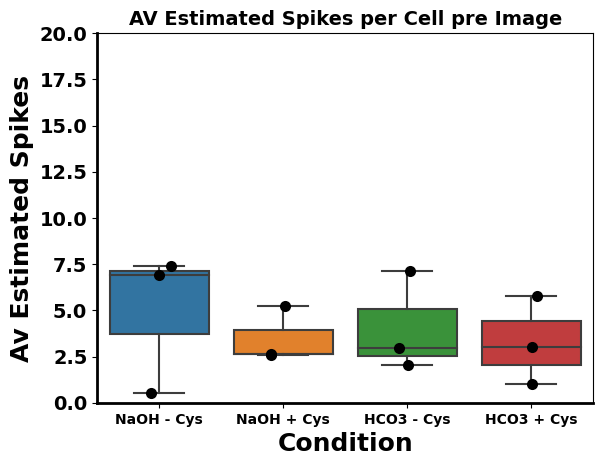

In [52]:
#Graph overall Av/ cells that conducted
#use overview file

data = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\overview.csv")

data = {
    'Condition': [ 'NaOH - Cys', 'NaOH - Cys', 'NaOH - Cys', 'NaOH + Cys','NaOH + Cys', 'NaOH + Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys', 'HCO3 + Cys'],
    'Value': [15.93/29, 332.24/45, 400.78/58, 96.92/37, 114.67/44, 294.2/56, 122.13/41, 74.11/36, 285.87/40, 48/48, 130.41/43, 168.17/29]
}

print(data)

df = pd.DataFrame(data)

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()

plt.title('AV Estimated Spikes per Cell pre Image', fontweight='bold', fontsize=14)
plt.xlabel('Condition', fontweight='bold', fontsize=18)
plt.ylabel('Av Estimated Spikes', fontweight='bold', fontsize=18)
plt.ylim([0, 20])
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=10)
plt.show()

In [35]:
#CV for single cell Av and how that fluctuates, well Cv in graph
#what is every cell contibuting to cv
#CV_ISF

data = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_1FBS_Hiber_1.csv")
data2 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_1FBS_Hiber_2.csv")
data3 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Hiber_1.csv")
data4 = pd.read_csv(r"D:\zeiss\Desktop\charlotte\preliminary hibernate data\Data\final_prediction_files\predictions_deltaF_2FBS_Hiber_2.csv")

data['average'] = data.apply(lambda row: row.mean(), axis=1)
data['std_dev'] = data.apply(lambda row: row.std(), axis=1)
data2['average'] = data2.apply(lambda row: row.mean(), axis=1)
data2['std_dev'] = data2.apply(lambda row: row.std(), axis=1)
data3['average'] = data3.apply(lambda row: row.mean(), axis=1)
data3['std_dev'] = data3.apply(lambda row: row.std(), axis=1)
data4['average'] = data4.apply(lambda row: row.mean(), axis=1)
data4['std_dev'] = data4.apply(lambda row: row.std(), axis=1)

overall_average = df['average'].mean()
overall_std_dev = df['std_dev'].std()
overall_average2 = df['average'].mean()
overall_std_dev2 = df['std_dev'].std()
overall_average3 = df['average'].mean()
overall_std_dev3 = df['std_dev'].std()
overall_average4 = df['average'].mean()
overall_std_dev4 = df['std_dev'].std()

overall_ratio = overall_std_dev / overall_average
overall_ratio2 = overall_std_dev2 / overall_average2
overall_ratio3 = overall_std_dev3 / overall_average3
overall_ratio4 = overall_std_dev4 / overall_average4

print(overall_ratio)
print(overall_ratio2)
print(overall_ratio3)
print(overall_ratio4)

data = {
    'Condition': ['1% FBS Hibernate', '1% FBS Hibernate'],
    'Value': [8.769543534820603, 8.769543534820603]
}

df = pd.DataFrame(data)

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
means = df.groupby('Condition')['Value'].mean().reset_index()
plt.title('Overall Ratio of Standard Deviation to Average')
plt.xlabel('Row Index')
plt.ylabel('Overall Ratio')
plt.show()


KeyError: 'average'

In [ ]:
data1 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start/experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well001_prediction.csv')
data2 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start/experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well005_prediction.csv')
data3 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start/experiment start NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well009_prediction.csv')
data4 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well002_prediction.csv')
data5 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well006_prediction.csv')
data6 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well010_prediction.csv')
data7 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well003_prediction.csv')
data8 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well007_prediction.csv')

data9 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start/experiment start HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well011_prediction.csv')
data10 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well004_prediction.csv')
data11 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well008_prediction.csv')
data12 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\start\experiment start HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_10fps_exp_well012_prediction.csv')

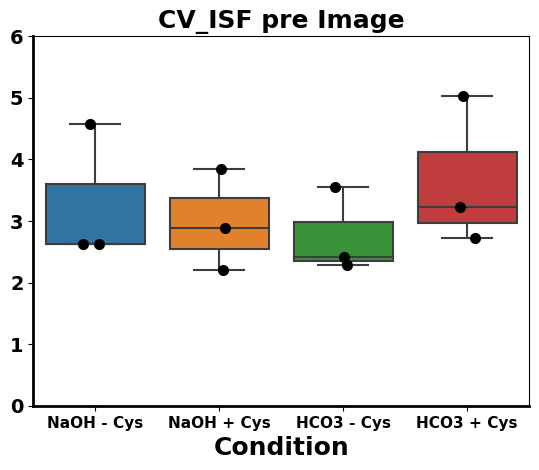

In [35]:
import matplotlib.pyplot as plt
import numpy as np

data1 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image/pre image NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well001_prediction.csv')
data2 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image/pre image NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well005_prediction.csv')
data3 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image/pre image NaOH-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well009_prediction.csv')
data4 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image\pre image NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well002_prediction.csv')
data5 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image\pre image NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well006_prediction.csv')
data6 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image\pre image NaOH Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well010_prediction.csv')
data7 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image\pre image HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well003_prediction.csv')
data8 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image\pre image HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well007_prediction.csv')

data9 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image/pre image HCO3-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well011_prediction.csv')
data10 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well004_prediction.csv')
data11 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well008_prediction.csv')
data12 = pd.read_csv(r'C:\processing\240322 HCO3 vs NaOH\final_prediction_files\pre_image\pre image HCO3 Cys-240322_wtRt_DIV15_C0703_100k_bc_10x_4fps_HA_pre_well012_prediction.csv')


dataframes = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12]
ratios = []
conditions = ['NaOH - Cys', 'NaOH - Cys','NaOH - Cys', 'NaOH + Cys', 'NaOH + Cys', 'NaOH + Cys', 'HCO3 - Cys','HCO3 - Cys',
                  'HCO3 - Cys', 'HCO3 + Cys', 'HCO3 + Cys','HCO3 + Cys']

for df in dataframes:
    df['average'] = df.apply(lambda row: row.mean(), axis=1)
    df['std_dev'] = df.apply(lambda row: row.std(), axis=1)
    overall_average = df['average'].mean()
    overall_std_dev = df['std_dev'].mean()
    overall_ratio = overall_std_dev / overall_average
    ratios.append(overall_ratio)

df = pd.DataFrame({'Value': ratios, 'Condition': conditions})

sns.boxplot(x='Condition', y='Value', data=df)
sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
plt.title('CV_ISF pre Image', fontsize=18, fontweight='bold')
plt.xlabel('Condition', fontsize=18, fontweight='bold')
#plt.ylabel('Overall Ratio', fontsize=18, fontweight='bold')
plt.ylabel('')
plt.ylim([0, 6])
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().spines['bottom'].set_linewidth(2)  # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)    # Thicker y-axis
plt.yticks(fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=11)
plt.show()

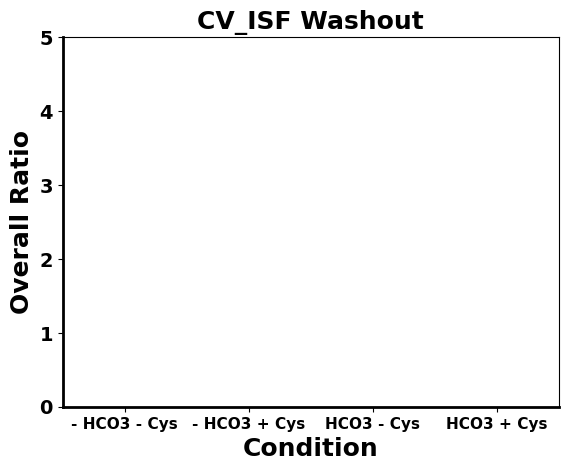

In [164]:
base_dir = r'C:\processing\charlotte\240506 HCO Cysteine relationship ph 7,6\final_prediction_files'

file_names = [
    'no_bic_wash/predictions_deltaF_nb_nc_2.csv',
    'no_bic_wash/predictions_deltaF_nb_nc_3.csv',
    'no_bic_wash/predictions_deltaF_nb_nc_1.csv',
    'no_bic_wash/predictions_deltaF_nb_c_1.csv',
    'no_bic_wash/predictions_deltaF_nb_c_2.csv',
    'no_bic_wash/predictions_deltaF_nb_c_3.csv',
    'bic_wash/predictions_deltaF_b_nc_2.csv',
    'bic_wash/predictions_deltaF_b_nc_3.csv',
    'bic_wash/predictions_deltaF_b_nc_4.csv',
    'bic_wash/predictions_deltaF_b_c_1.csv',
    'bic_wash/predictions_deltaF_b_c_3.csv',
    'bic_wash/predictions_deltaF_b_c_3.csv',
    'bic_wash/predictions_deltaF_b_c_4.csv'
]

def read_files(base_dir, file_names):
    data = []
    for file_name in file_names:
        file_path = f"{base_dir}/{file_name}"
        df = pd.read_csv(file_path)
        data.append(df)
    return data

def process_data(data):
    combined_values = []
    conditions = []

    for i, df in enumerate(data):
        average_row_sum = df.sum(axis=1).mean()
        total_column_sum = df.sum(axis=0).sum()
        combined_value = (average_row_sum + total_column_sum) / 2
        combined_values.append(combined_value)
        if i < 3:
            condition = '- HCO3 - Cys'
        elif i < 6:
            condition = '- HCO3 + Cys'
        elif i < 9:
            condition = 'HCO3 - Cys'
        else:
            condition = 'HCO3 + Cys'
        conditions.append(condition)
    return combined_values, conditions


def create_boxplot(combined_values, conditions):
    data = {'Value': combined_values, 'Condition': conditions}
    df = pd.DataFrame(data)

    sns.boxplot(x='Condition', y='Value', data=df)
    sns.stripplot(x='Condition', y='Value', data=df, color='black', size=8, jitter=True)
    plt.title('CV_ISF Washout', fontsize=18, fontweight='bold')
    plt.xlabel('Condition', fontsize=18, fontweight='bold')
    plt.ylabel('Overall Ratio', fontsize=18, fontweight='bold')
    plt.ylim([0, 5])
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_linewidth(2)
    plt.yticks(fontweight='bold', fontsize=14)
    plt.xticks(fontweight='bold', fontsize=11)
    plt.show()

if __name__ == '__main__':
    data = read_files(base_dir, file_names)
    combined_values, conditions = process_data(data)
    create_boxplot(combined_values, conditions)